In [1]:
import rebound, rebound.data
print(rebound.__build__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

May 21 2017 21:35:11


In [42]:
def run():
    sim = rebound.Simulation()
    
    rebound.data.add_outer_solar_system(sim)    
    for i in range(1,6):
        sim.particles[i].m *=50.
        sim.particles[i].r = 0.0017216443
    sim.particles[0].r = 0.0046524726
    sim.move_to_com()
    
    sim.integrator = "mercurius"
    sim.collision = "direct"
    sim.collision_resolve = "merge"
    sim.dt = 3.*11./365.*2.*np.pi 
    sim.ri_ias15.min_dt = 1e-9*sim.dt
    sim.ri_mercurius.rcrit = 5

    N=1000
    times = np.linspace(0.,2.*np.pi*1e3,N)
    energy = np.zeros((N))
    enc = np.zeros((N)) 
    ec = np.zeros((N)) 
    for i in range(N):
        sim.integrate(times[i],exact_finish_time=0)
        energy[i] = sim.calculate_energy()
        enc[i] = sim.ri_mercurius._encounterN
        ec[i] = max([0.]+[sim.particles[k].e for k in range(1,sim.N)])
    return times, energy, enc, ec

In [43]:
times, energy, enc, ec = run()

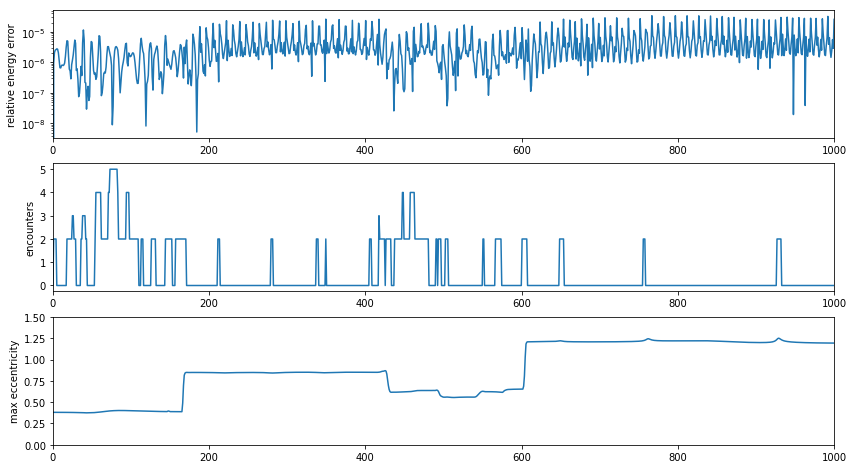

In [44]:
fix, ax = plt.subplots(3,1,figsize=(14,8))

ax[0].set_ylabel("relative energy error")
ax[0].set_yscale("log")
ax[0].set_xlim([0.,times[-1]/2./np.pi])
ax[0].plot(times/2./np.pi, np.fabs((energy-energy[0])/energy[0]));

ax[1].set_ylabel("encounters")
ax[1].set_xlim([0.,times[-1]/2./np.pi])
ax[1].plot(times/2./np.pi, enc);

ax[2].set_ylabel("max eccentricity")
ax[2].set_xlim([0.,times[-1]/2./np.pi])
ax[2].set_ylim([0.,1.5])
ax[2].plot(times/2./np.pi, ec);